# Car prowls becoming a Seattle headache 

**Car prowling, breaking into your car and stealing anything of value, is Seattle's most frequently reported crime for the summer of 2014. As shown in the chart below, car prowling incidents has been lodged more than 6000 times in the past three months with the Police - substantially higher than any other kind of offence.**

In [2]:

#==============================================================================
# Importing
#==============================================================================
import numpy as np
import pandas as pd
df = pd.read_csv('C:\JupyterNotebooks\seattle_incidents_summer_2014.csv')
import warnings 
warnings.filterwarnings('ignore') 


#==============================================================================
# Data Type
#==============================================================================
df['Date Reported'] = pd.to_datetime(df['Date Reported'])
df['Occurred Date or Date Range Start'] = pd.to_datetime(df['Occurred Date or Date Range Start'])
df['Occurred Date Range End'] = pd.to_datetime(df['Occurred Date Range End'])


C:\Users\Krishanju\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<function matplotlib.pyplot.show>

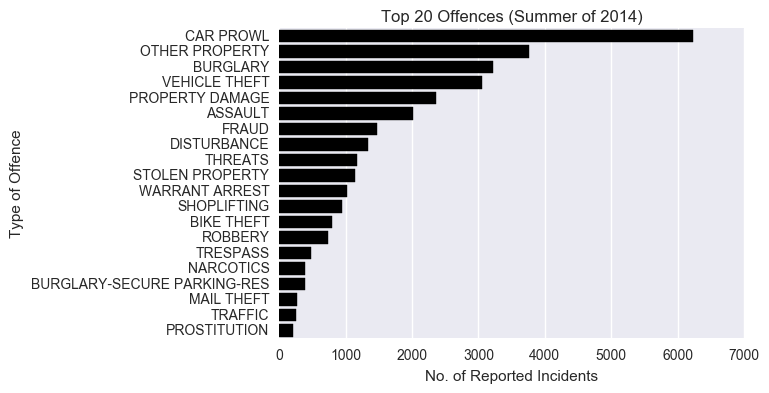

In [5]:
#==============================================================================
# Highest Type of Offence
#==============================================================================
%matplotlib inline  
import seaborn as sns

df1 = df.groupby('Summarized Offense Description', as_index=False).count()
df1.sort_values(by='RMS CDW ID',ascending = False,inplace = True) #inplace=False by default
df2 = df1.head(20)

import matplotlib.pyplot as plt
sns.set_style("darkgrid") #{darkgrid, whitegrid, dark, white, ticks}
p = sns.barplot(x='RMS CDW ID',y='Summarized Offense Description',data=df2, color="black")
p.set(xlabel='No. of Reported Incidents', ylabel='Type of Offence')
plt.title('Top 20 Offences (Summer of 2014)')
plt.show

**From the heat map below it is evident that these offences are usually committed after the sun goes down, spiking in and around midnight. This trend resonates across all days of the week although there a noticeable peak on Friday midnights where the incidents recorded in the last three months shot more than 160 between 11 p.m. and 1 a.m.**

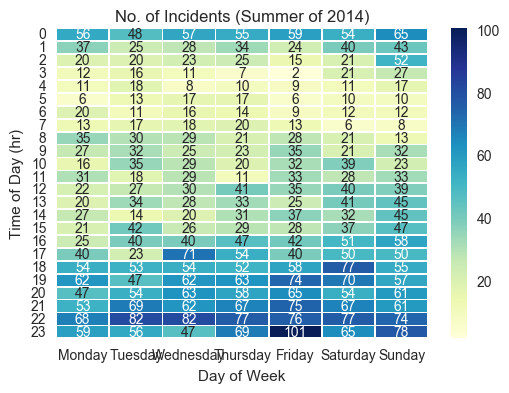

In [24]:
#==============================================================================
# Time and Day of Week of Offence
#==============================================================================
cp= df[(df['Summarized Offense Description']=='CAR PROWL')] 
cp['Hour of Day'] = [r.hour for r in cp['Occurred Date or Date Range Start']]
cp['day_of_week'] = cp['Occurred Date or Date Range Start'].dt.weekday_name
cp1 = cp.groupby([cp['Hour of Day'], cp['day_of_week']], as_index=False).size().unstack()
cp1 = cp1[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
sns.heatmap(cp1, annot = True,cmap="YlGnBu",linewidths=.5,fmt = '.3g').set(xlabel='Day of Week', ylabel='Time of Day (hr)')
plt.title('No. of Incidents (Summer of 2014)')

**The Seattle Police are happy that the cases are being reported by the victims almost immediately irrespective of the time of the day the crime is committed. This allows swift response and hence greater probability in catching the offender.**

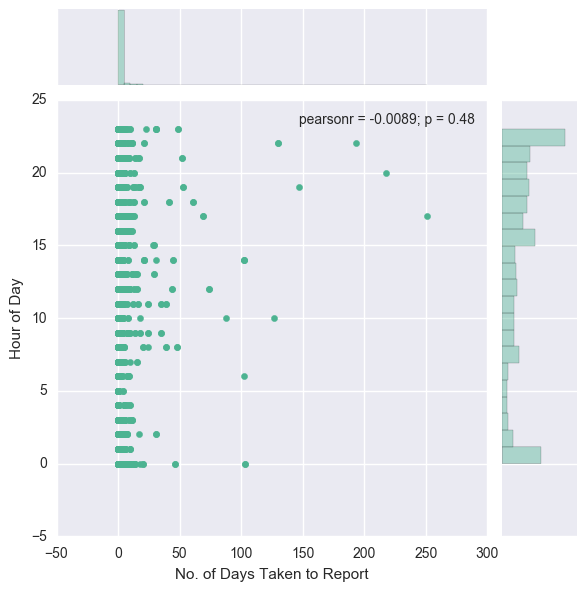

In [27]:
cp['diffdays']= cp['Date Reported'] - cp['Occurred Date or Date Range Start']
cp['No. of Days Taken to Report'] = cp['diffdays'].dt.days
dtr = cp.groupby('No. of Days Taken to Report', as_index=False).count()
dtr.sort_values(by='RMS CDW ID',ascending = False,inplace = True) #inplace=False by default
p=sns.jointplot(x="No. of Days Taken to Report", y="Hour of Day", data=cp, color="#4CB391")

**M and D are the top worst two sectors they amount for a staggering 1400 car prowling incidents in just the last three months. Readers living in this district should take extra care to protect your cars.**

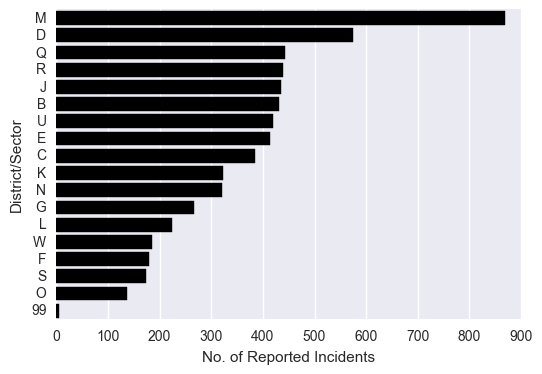

In [41]:
#==============================================================================
# Which district
#==============================================================================
  

dis = cp.groupby('District/Sector', as_index=False).count()
dis.sort_values(by='RMS CDW ID',ascending = False,inplace = True) #inplace=False by default
sns.set_style("darkgrid") #{darkgrid, whitegrid, dark, white, ticks}
p = sns.barplot(x='RMS CDW ID',y='District/Sector',data=dis, color="black")
p.set(xlabel='No. of Reported Incidents', ylabel='District/Sector')
